<a href="https://colab.research.google.com/github/sanlamia/MLsummer24/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Validation accuracy for SVM with linear kernel: 0.8270
Validation accuracy for SVM with rbf kernel: 0.8655
Validation accuracy for SVM with poly kernel: 0.8185
Test accuracy for SVM with linear kernel: 0.9377


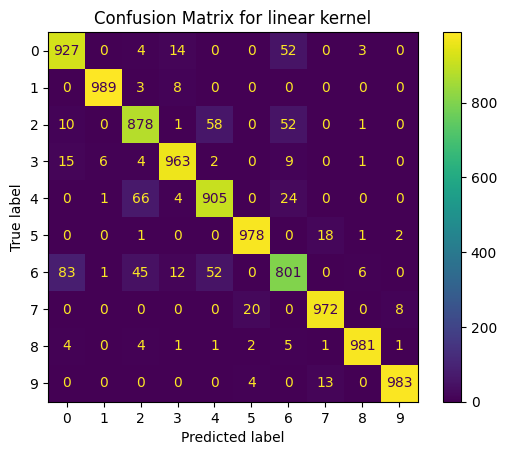

Test accuracy for SVM with rbf kernel: 0.8957


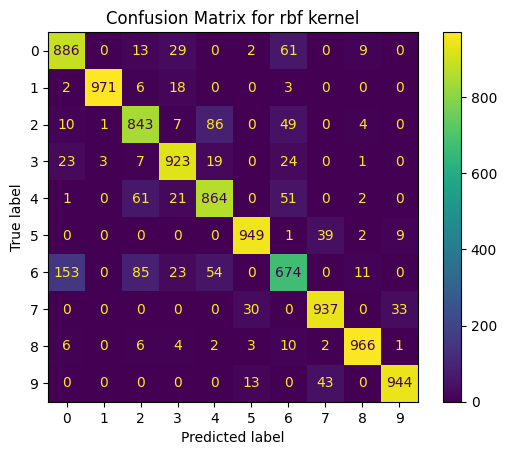

Test accuracy for SVM with poly kernel: 0.8800


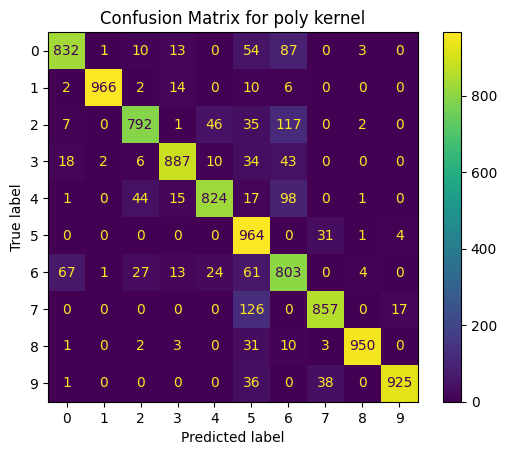

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END .....................................C=0.1, gamma=1; total time=  29.5s
[CV] END .....................................C=0.1, gamma=1; total time=  28.8s
[CV] END .....................................C=0.1, gamma=1; total time=  30.6s
[CV] END ...................................C=0.1, gamma=0.1; total time=  27.3s
[CV] END ...................................C=0.1, gamma=0.1; total time=  27.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=  26.7s
[CV] END ..................................C=0.1, gamma=0.01; total time=  14.5s
[CV] END ..................................C=0.1, gamma=0.01; total time=  14.3s
[CV] END ..................................C=0.1, gamma=0.01; total time=  14.4s
[CV] END .................................C=0.1, gamma=0.001; total time=  20.1s
[CV] END .................................C=0.1, gamma=0.001; total time=  21.5s
[CV] END .................................C=0.1,

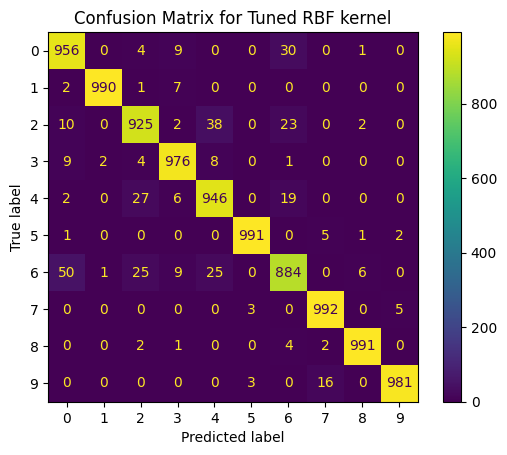

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the Fashion MNIST dataset from Kaggle
train_data = pd.read_csv('/content/fashion-mnist_test.csv')
test_data = pd.read_csv('/content/fashion-mnist_test.csv')

# Preprocess the data
X_train = train_data.iloc[:, 1:].values / 255.0  # Scale pixel values to [0, 1]
y_train = train_data.iloc[:, 0].values

X_test = test_data.iloc[:, 1:].values / 255.0
y_test = test_data.iloc[:, 0].values

# Split training data into 80% train and 20% validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# SVM Models with different kernels
kernels = ['linear', 'rbf', 'poly']
svm_models = {}

for kernel in kernels:
    if kernel == 'poly':
        model = svm.SVC(kernel=kernel, degree=3)
    else:
        model = svm.SVC(kernel=kernel)

    model.fit(X_train, y_train)
    svm_models[kernel] = model

# Evaluate the models on the validation data
for kernel, model in svm_models.items():
    y_pred_val = model.predict(X_val)
    accuracy_val = accuracy_score(y_val, y_pred_val)
    print(f"Validation accuracy for SVM with {kernel} kernel: {accuracy_val:.4f}")

# Evaluate the models on the test data
for kernel, model in svm_models.items():
    y_pred_test = model.predict(X_test)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    print(f"Test accuracy for SVM with {kernel} kernel: {accuracy_test:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred_test)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f'Confusion Matrix for {kernel} kernel')
    plt.show()

# Hyperparameter Tuning for RBF kernel
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]}
grid = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, refit=True, verbose=2, cv=3)
grid.fit(X_train, y_train)

# Best Parameters and Model
print(f"Best parameters found: {grid.best_params_}")
best_rbf_model = grid.best_estimator_

# Evaluate the tuned model on the test data
y_pred_best_rbf = best_rbf_model.predict(X_test)
accuracy_best_rbf = accuracy_score(y_test, y_pred_best_rbf)
print(f"Test accuracy for best RBF kernel model: {accuracy_best_rbf:.4f}")

# Confusion Matrix for tuned RBF model
cm_best_rbf = confusion_matrix(y_test, y_pred_best_rbf)
disp_best_rbf = ConfusionMatrixDisplay(confusion_matrix=cm_best_rbf)
disp_best_rbf.plot()
plt.title('Confusion Matrix for Tuned RBF kernel')
plt.show()


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

# Load the dataset
data = pd.read_csv("/content/boston.csv")  # Update with the correct path

# Inspect column names to find the correct target column
print(data.columns)

# Replace 'target_column_name' with the actual target column name from your dataset
# Example: 'MEDV' for Boston Housing data
X = data.drop("MEDV", axis=1)  # Replace with the actual target column name
y = data["MEDV"]  # Replace with the actual target column name

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train SVR models
svr_linear = SVR(kernel='linear')
svr_rbf = SVR(kernel='rbf')

svr_linear.fit(X_train, y_train)
svr_rbf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_linear = svr_linear.predict(X_test)
y_pred_rbf = svr_rbf.predict(X_test)

# Calculate and print the following metrics for each model
mse_linear = mean_squared_error(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

mse_rbf = mean_squared_error(y_test, y_pred_rbf)
mae_rbf = mean_absolute_error(y_test, y_pred_rbf)
r2_rbf = r2_score(y_test, y_pred_rbf)

print(f"Linear SVR: MSE = {mse_linear}, MAE = {mae_linear}, R2 = {r2_linear}")
print(f"RBF SVR: MSE = {mse_rbf}, MAE = {mae_rbf}, R2 = {r2_rbf}")

# Optional: Hyperparameter Tuning for the RBF kernel using Grid Search
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1]
}

grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best parameters and evaluate the tuned model
best_svr_rbf = grid_search.best_estimator_

y_pred_best_rbf = best_svr_rbf.predict(X_test)
mse_best_rbf = mean_squared_error(y_test, y_pred_best_rbf)
mae_best_rbf = mean_absolute_error(y_test, y_pred_best_rbf)
r2_best_rbf = r2_score(y_test, y_pred_best_rbf)

print(f"Tuned RBF SVR: MSE = {mse_best_rbf}, MAE = {mae_best_rbf}, R2 = {r2_best_rbf}")

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')
Linear SVR: MSE = 28.91852267161847, MAE = 3.1035741489512207, R2 = 0.6056589279132574
RBF SVR: MSE = 25.668539678396044, MAE = 2.7317161761558393, R2 = 0.6499766059760035
Tuned RBF SVR: MSE = 12.551945372890009, MAE = 2.1714957404725608, R2 = 0.8288381584589897
